---
# Data Science and Artificial Intelliegence Practicum
## 5-modul. Machine Learning
---

## 5.14 - Clustering

**Practice** \
In this exercise, we generate random data points and cluster these points. Objective: To see how the clustering algorithm works.

### Imports and loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### Generating and visualizing data

We use the `make_blobs` function to create a cluster of random blobs. \
*Some of the parameters:*
- `n_samples` - the number of points
- `centers` - the number of centers to generate, or the fixed center locations
- `cluster_std` - the standard deviation of the clusters.

*Reutrns:*
- **`X`:** an array represents coordinates of the generated samples.
- **`y`:** the integer labels assigned to each sample, indicating which cluster it belongs to.

In [2]:
np.random.seed(0)  # Sets the random seed for NumPy.
centroids = [[3, 3], [-3, -2], [2, -3], [0, 0]]
X, y = make_blobs(n_samples=5000, centers=centroids, cluster_std=0.8)

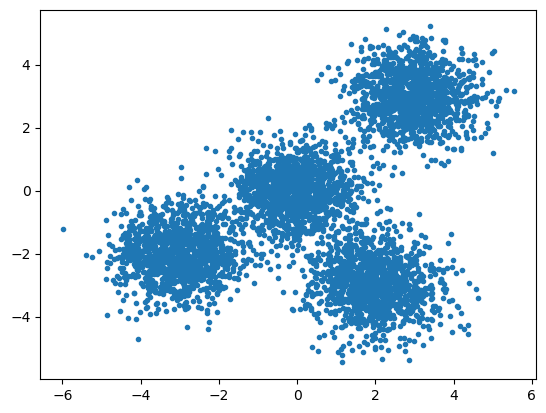

In [3]:
# Plotting the points
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

### k-means algorithm

**sklearn.cluster.KMeans** parameters:
- **`n_clusters`:** ***int, default=8***\
The number of clusters to form as well as the number of centroids to generate.
- **`init`:** ***{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’***\
Method for initialization of centroids.
- **`n_init`:** ***'auto' or int, default=10***\
Number of times the algorithm will be run with different centroid seeds.

In [4]:
k_means = KMeans(n_clusters=4, init='random', n_init=15)
k_means.fit(X)

KMeans(init='random', n_clusters=4, n_init=15)

`labels_` attribute represents the cluster labels assigned to each sample in the fitted model.

In [5]:
k_means.labels_

array([1, 0, 0, ..., 3, 1, 1])

`cluster_centers_` attribute represents the coordinates of the final cluster centers that the algorithm converged to after fitting the model to the data.

In [6]:
k_means.cluster_centers_

array([[ 1.99348887e+00, -3.01067931e+00],
       [-3.01979724e+00, -1.99489798e+00],
       [-3.05006801e-02,  1.12353254e-03],
       [ 2.97795387e+00,  2.99317691e+00]])

We compare the cluster centers found by the algorithm with the centers we gave earlier:

In [7]:
print(centroids)

[[3, 3], [-3, -2], [2, -3], [0, 0]]


Nearly the same:

In [8]:
np.round(k_means.cluster_centers_)

array([[ 2., -3.],
       [-3., -2.],
       [-0.,  0.],
       [ 3.,  3.]])

### Visualization

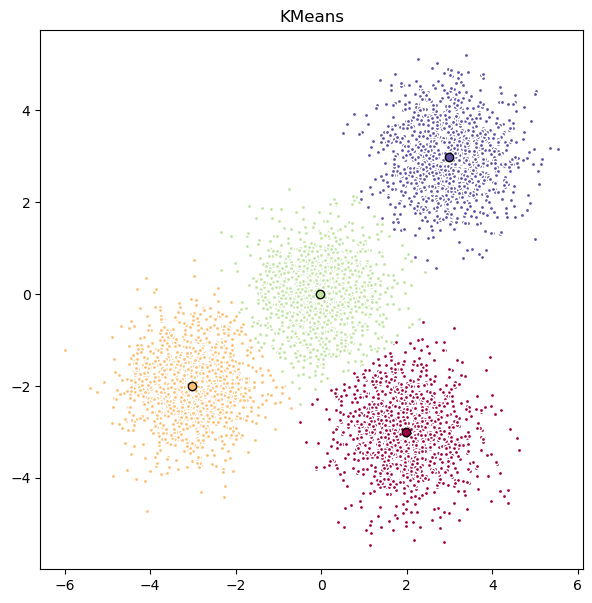

In [44]:
fig, ax = plt.subplots(figsize=(7, 7))
# Separate colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(k_means.cluster_centers_)))

for k, col in zip(range(len(k_means.cluster_centers_)), colors):
    # Create a list of all data points, where the data points that are in the
    # cluster are labeled as true, else they are labeled as false.
    my_members = (k_means.labels_ == k)
    # Defune the centroid.
    cluster_center = k_means.cluster_centers_[k]
    # Plot the data points with color.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    # Plot the centroids with color, with a darker outline and bigger size.
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
plt.show()

### Task

Try training `KMeans` algorithm with different `k` (number of clusters) and different `init` parameter (`k-means++`).\
*Expected Result:*

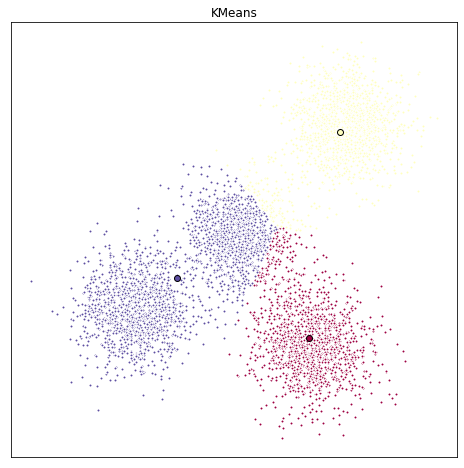

In [37]:
k_means_sample = KMeans(n_clusters=3, init='k-means++', n_init=10)
k_means_sample.fit(X)

KMeans(n_clusters=3, n_init=10)

In [38]:
k_means_sample.labels_

array([1, 0, 0, ..., 2, 1, 1])

In [40]:
np.round(k_means_sample.cluster_centers_)

array([[ 2., -3.],
       [-2., -1.],
       [ 3.,  3.]])

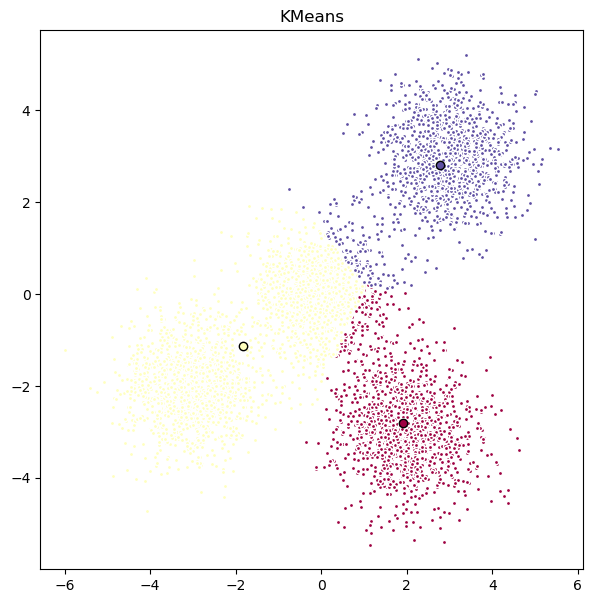

In [47]:
fig, ax = plt.subplots(figsize=(7, 7))
# Separate colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(k_means_sample.cluster_centers_)))

for k, col in zip(range(len(k_means_sample.cluster_centers_)), colors):
    # Create a list of all data points, where the data points that are in the
    # cluster are labeled as true, else they are labeled as false.
    my_members = (k_means_sample.labels_ == k)
    # Defune the centroid.
    cluster_center = k_means_sample.cluster_centers_[k]
    # Plot the data points with color.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    # Plot the centroids with color, with a darker outline and bigger size.
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
plt.show()